In [1]:
#Data Preprocessing Template
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
# y = dataset.iloc[:, 3].values

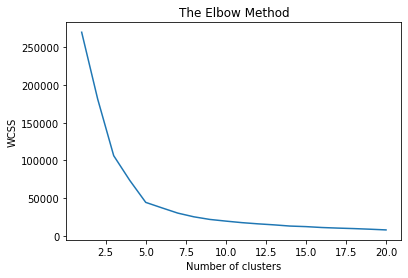

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans=kmeans.fit_predict(X)

In [11]:
X[y_kmeans==0]

array([[15, 81],
       [16, 77],
       [17, 76],
       [18, 94],
       [19, 72],
       [19, 99],
       [20, 77],
       [20, 79],
       [21, 66],
       [23, 98],
       [24, 73],
       [25, 73],
       [28, 82],
       [28, 61],
       [29, 87],
       [30, 73],
       [33, 92],
       [33, 81],
       [34, 73],
       [37, 75],
       [38, 92],
       [39, 65]], dtype=int64)

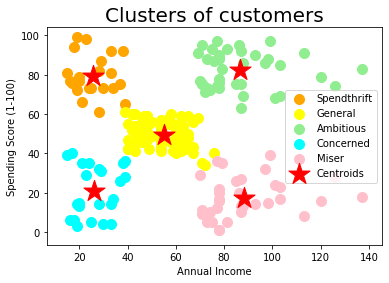

In [30]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'orange', label = 'Spendthrift')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'yellow', label = 'General')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'lightgreen', label = 'Ambitious')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Concerned')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Miser')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],marker="*", s = 500, c = 'red', label = 'Centroids')
plt.title('Clusters of customers',fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()